<a href="https://colab.research.google.com/github/shruti-2608/starting-/blob/main/Recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [9]:
rating_data = pd.read_csv('/content/ratings.csv')
movie_data = pd.read_csv('/content/movies.csv')

In [10]:

rating_data

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [11]:
movie_data

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [12]:
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [13]:
rating_data['rating'].unique()


array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [14]:
rating_data['rating'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

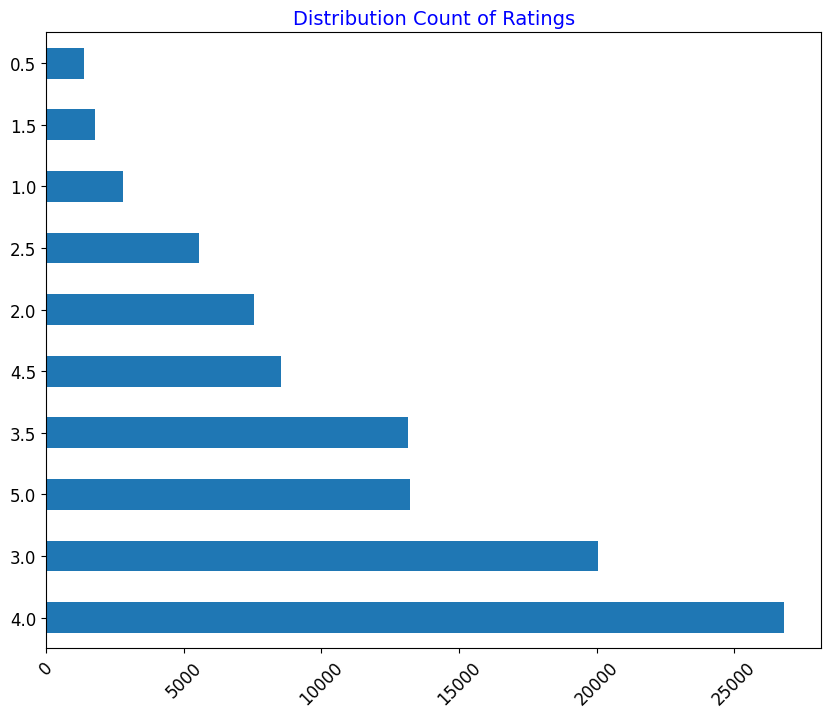

In [15]:
plt.figure(figsize = (10,8))
rating_data['rating'].value_counts().plot(kind = 'barh')
plt.title("Distribution Count of Ratings", fontsize = 14, color = 'blue')
plt.xticks(rotation = 45, fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()


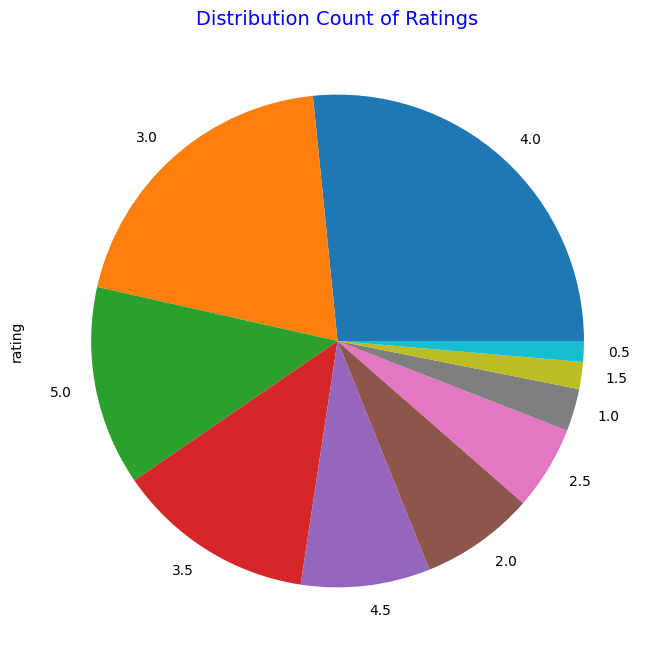

In [16]:
plt.figure(figsize = (10,8))
rating_data['rating'].value_counts().plot(kind = 'pie')
plt.title("Distribution Count of Ratings", fontsize = 14, color = 'blue')
plt.xticks(rotation = 45, fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [17]:
rating_data = rating_data.drop("timestamp", axis=1)

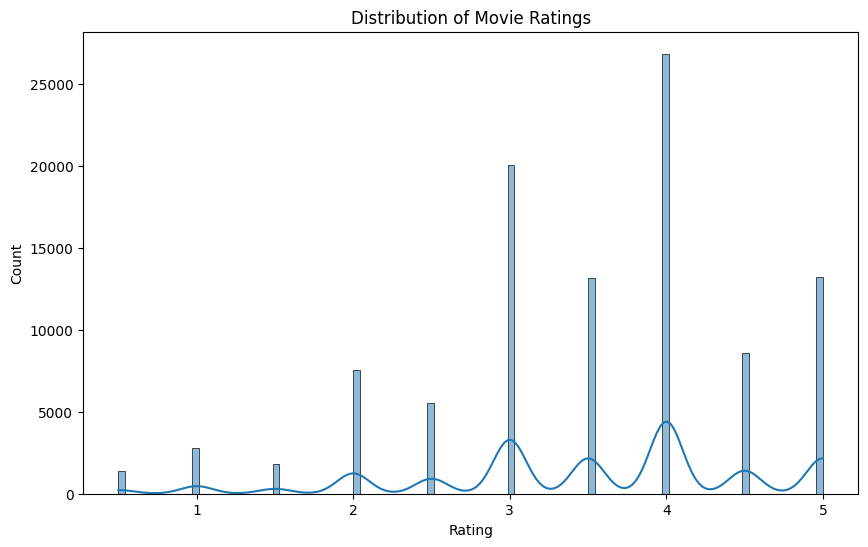

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(rating_data['rating'], kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


In [19]:
rating_data

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


In [20]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel
import pandas as pd

data = pd.read_csv('/content/movies.csv')

In [21]:
movie_data ['genres'] = movie_data['genres'].str.replace('|', ' ')

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Apply TF-IDF vectorization to movie genres
tfidf_matrix = vectorizer.fit_transform(movie_data['genres'])



<ipython-input-21-7d7b5e66f798>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movie_data ['genres'] = movie_data['genres'].str.replace('|', ' ')


In [22]:
# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Example: Get the top 10 similar movies for a given movie
movie_index = 0  # Example: Movie index to compute similar movies for
similar_movies = list(enumerate(cosine_sim[movie_index]))
similar_movies = sorted(similar_movies, key=lambda x: x[1], reverse=True)[1:11]
similar_movie_indices = [movie[0] for movie in similar_movies]



In [23]:
# Retrieve the similar movie titles
similar_movie_titles = movie_data.iloc[similar_movie_indices]['title'].values

# Print the similar movies
print(f"Top 10 Similar Movies to '{movie_data.iloc[movie_index]['title']}':")
print(similar_movie_titles)

Top 10 Similar Movies to 'Toy Story (1995)':
['Antz (1998)' 'Toy Story 2 (1999)'
 'Adventures of Rocky and Bullwinkle, The (2000)'
 "Emperor's New Groove, The (2000)" 'Monsters, Inc. (2001)'
 'Wild, The (2006)' 'Shrek the Third (2007)'
 'Tale of Despereaux, The (2008)'
 'Asterix and the Vikings (Astérix et les Vikings) (2006)' 'Turbo (2013)']


In [24]:
# Function to recommend similar movies
def get_movie_recommendations(movie_title, top_n=5):
    # Get the movie index for the given movie title
    movie_index = movie_data[movie_data['title'] == movie_title].index[0]

    # Get the cosine similarity scores for the movie
    movie_sim_scores = list(enumerate(cosine_sim[movie_index]))
      # Sort the movies based on similarity scores
    movie_sim_scores = sorted(movie_sim_scores, key=lambda x: x[1], reverse=True)

    # Get the top N similar movies
    top_similar_movies = movie_sim_scores[1:top_n+1]

    # Get the indices and titles of the similar movies
    similar_movie_indices = [movie[0] for movie in top_similar_movies]
    similar_movie_titles = movie_data.iloc[similar_movie_indices]['title'].values

    return similar_movie_titles


In [25]:



# Example usage
movie_title = "Toy Story (1995)"
recommended_movies = get_movie_recommendations(movie_title, top_n=5)

print(f"Recommended movies for '{movie_title}':")
for movie in recommended_movies:
    print(movie)

Recommended movies for 'Toy Story (1995)':
Antz (1998)
Toy Story 2 (1999)
Adventures of Rocky and Bullwinkle, The (2000)
Emperor's New Groove, The (2000)
Monsters, Inc. (2001)


In [26]:
from scipy.stats import pearsonr


In [27]:
# Pivot the ratings data to create a user-item matrix
ratings_matrix = rating_data.pivot(index='userId', columns='movieId', values='rating')
# Assuming you have a ratings matrix named 'ratings_matrix' with NaN values
# Fill NaN values with 0
ratings_matrix_filled = ratings_matrix.fillna(0)

# Calculate the cosine similarity matrix
cosine_similarity_matrix = cosine_similarity(ratings_matrix_filled.T, dense_output=False)

# Calculate the Pearson correlation coefficient between movies
corr_matrix = ratings_matrix.corr()



In [28]:
# Function to recommend similar movies based on Pearson correlation
def get_movie_recommendations(movie_id, top_n=5):
    # Get the correlation scores for the movie
    movie_corr_scores = corr_matrix[movie_id]

    # Sort the movies based on correlation scores
    movie_corr_scores = movie_corr_scores.sort_values(ascending=False)

    # Get the top N similar movies
    top_similar_movies = movie_corr_scores.iloc[1:top_n+1]

    # Get the movie IDs and titles of the similar movies
    similar_movie_ids = top_similar_movies.index
    similar_movie_titles = movie_data[movie_data['movieId'].isin(similar_movie_ids)]['title']

    return similar_movie_titles



In [29]:
# Example usage
movie_id = 1  # Example: Movie ID of "Toy Story (1995)"
recommended_movies = get_movie_recommendations(movie_id, top_n=5)

print(f"Recommended movies for 'Toy Story (1995)':")
for movie in recommended_movies:
    print(movie)

Recommended movies for 'Toy Story (1995)':
Gridlock'd (1997)
Steel (1997)
Bachelor and the Bobby-Soxer, The (1947)
Date Movie (2006)
Robot & Frank (2012)


In [30]:
# Function to recommend similar movies using hybrid filtering
def get_movie_recommendations(movie_id, top_n=5):
    # Get the cosine similarity scores for the movie
    movie_cosine_scores = list(enumerate(cosine_sim[movie_id]))

    # Get the Pearson correlation scores for the movie
    movie_corr_scores = corr_matrix[movie_id]

    # Combine the cosine and correlation scores
    hybrid_scores = [(i, (cosine_score + corr_score) / 2) for i, (cosine_score, corr_score) in movie_cosine_scores]

    # Sort the movies based on hybrid scores
    hybrid_scores = sorted(hybrid_scores, key=lambda x: x[1], reverse=True)

    # Get the top N similar movies
    top_similar_movies = hybrid_scores[1:top_n+1]

    # Get the movie IDs and titles of the similar movies
    similar_movie_ids = [movie[0] for movie in top_similar_movies]
    similar_movie_titles = movie_data[movie_data['movieId'].isin(similar_movie_ids)]['title']

    return similar_movie_titles

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

def plot_similarity_heatmap(similarity_matrix):
    # Convert the similarity matrix to a DataFrame
    similarity_df = pd.DataFrame(similarity_matrix)

    # Plot the similarity matrix as a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(similarity_df, cmap="YlGnBu", annot=True, fmt=".2f", square=True)
    plt.title("Cosine Similarity Heatmap")
    plt.xlabel("Item IDs")
    plt.ylabel("Item IDs")
    plt.show()

# Assuming you have a ratings matrix named 'ratings_matrix'
# Calculate the cosine similarity matrix
ratings_matrix_filled = ratings_matrix.fillna(0)

# Calculate the cosine similarity matrix
cosine_similarity_matrix = cosine_similarity(ratings_matrix_filled.T, dense_output=False)


# Plot the cosine similarity heatmap
plot_similarity_heatmap(cosine_similarity_matrix)


In [1]:
# Function to recommend similar movies using hybrid filtering
def get_movie_recommendations(movie_id, top_n=5):
    # Get the cosine similarity scores for the movie
    movie_cosine_scores = cosine_sim[movie_id]

    # Get the Pearson correlation scores for the movie
    movie_corr_scores = corr_matrix[movie_id]

    # Combine the cosine and correlation scores with weights
    hybrid_scores = (0.5 * movie_cosine_scores) + (0.5 * movie_corr_scores)

    # Sort the movies based on hybrid scores
    sorted_indices = hybrid_scores.argsort()[::-1]

    # Get the top N similar movies
    top_similar_movies = sorted_indices[1:top_n+1]

    # Get the movie titles of the similar movies
    similar_movie_titles = movie_data.iloc[top_similar_movies]['title']

    return similar_movie_titles



In [34]:
# Collaborative Filtering
def collaborative_filtering(user_id, ratings_matrix, similarity_matrix, k):
    # Compute the similarities between the target user and other users
    user_similarity = similarity_matrix[user_id]

    # Get the indices of the top k most similar users
    top_users = np.argsort(user_similarity)[::-1][:k]

    # Calculate the weighted average ratings of the top k similar users
    weighted_ratings = np.dot(user_similarity[top_users], ratings_matrix[top_users]) / np.sum(user_similarity[top_users])

    return weighted_ratings



In [35]:
# Content-Based Filtering
def content_based_filtering(user_id, movies_df, tfidf_matrix, k):
    # Get the user's movie preferences
    user_preferences = tfidf_matrix[user_id]

    # Calculate the cosine similarity between the user's preferences and all movies
    similarity_scores = cosine_similarity(tfidf_matrix, user_preferences.reshape(1, -1)).flatten()

    # Get the indices of the top k most similar movies
    top_movies = np.argsort(similarity_scores)[::-1][:k]

    return top_movies




In [36]:
# Hybrid Recommendation System
def hybrid_recommendation(user_id, ratings_matrix, similarity_matrix, movies_df, tfidf_matrix, k):
    # Collaborative Filtering
    collaborative_recommendations = collaborative_filtering(user_id, ratings_matrix, similarity_matrix, k)

    # Content-Based Filtering
    content_based_recommendations = content_based_filtering(user_id, movies_df, tfidf_matrix, k)

    # Merge the recommendations from both approaches
    hybrid_recommendations = np.concatenate((collaborative_recommendations, content_based_recommendations))

    # Remove duplicates and return the top k recommendations
    hybrid_recommendations = np.unique(hybrid_recommendations)[:k]

    return hybrid_recommendations

In [38]:
# Example usage
ratings_matrix = ...  # Your ratings matrix
similarity_matrix = ...  # Your similarity matrix (e.g., cosine similarity)
movies_df = ...  # Your movies dataframe
tfidf_matrix = ...  # Your TF-IDF matrix

user_id = 1
k = 10

recommendations = hybrid_recommendation(user_id, ratings_matrix, similarity_matrix, movies_df, tfidf_matrix, k)

# Display the recommended movie titles
recommended_movies = movies_df[movies_df['movieId'].isin(recommendations)]['title']
print(recommended_movies)

TypeError: ignored